In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:
import seaborn as sns

In [6]:
import numpy as np

In [7]:
data = pd.read_csv("dpwh_flood_control_projects_(cleaned).csv")

In [8]:
print(data.shape)
print(data.columns.tolist())
display(data.head())

(9855, 24)
['Region', 'Province', 'TypeOfWork', 'FundingYear', 'ApprovedBudgetForContract', 'ContractCost', 'ActualCompletionDate', 'StartDate', 'Contractor', 'ContractId', 'ProjectId', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23']


,Region,Province,TypeOfWork,FundingYear,ApprovedBudgetForContract,ContractCost,ActualCompletionDate,StartDate,Contractor,ContractId,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,XIV,Apayao,Construction of Flood Mitigation Structure,2021,96500000,92692943.8,10/3/2022,3/18/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XIV,Apayao,Construction of Flood Mitigation Structure,2021,49000000,47521251.3,11/24/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XIV,Apayao,Construction of Flood Mitigation Structure,2021,47423180,45942583.67,11/28/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,XIV,Apayao,Construction of Flood Mitigation Structure,2021,9900000,9900000,12/15/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,XIV,Apayao,Construction of Flood Mitigation Structure,2021,4950000,4950000,9/23/2022,12/1/2021,ALEPHNORTH PEAK CONSTRUCTION AND DEVELOPMENT CO.,21PC0034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#drop empty columns
data = data.dropna(axis=1, how='all')
display(data.head())

,Region,Province,TypeOfWork,FundingYear,ApprovedBudgetForContract,ContractCost,ActualCompletionDate,StartDate,Contractor,ContractId,ProjectId
0,XIV,Apayao,Construction of Flood Mitigation Structure,2021,96500000,92692943.8,10/3/2022,3/18/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0018,P00526268LZ
1,XIV,Apayao,Construction of Flood Mitigation Structure,2021,49000000,47521251.3,11/24/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0019,P00526368LZ
2,XIV,Apayao,Construction of Flood Mitigation Structure,2021,47423180,45942583.67,11/28/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0010,P00526369LZ
3,XIV,Apayao,Construction of Flood Mitigation Structure,2021,9900000,9900000,12/15/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0067,P00561270LZ
4,XIV,Apayao,Construction of Flood Mitigation Structure,2021,4950000,4950000,9/23/2022,12/1/2021,ALEPHNORTH PEAK CONSTRUCTION AND DEVELOPMENT CO.,21PC0034,P00561652LZ


In [10]:
#clean money-like columns (remove commas/currency signs -> numeric)
def clean_money(series):
    return pd.to_numeric(series.astype(str).str.replace(r'[^\d\.-]', '', regex=True), errors='coerce')

In [11]:
data['ApprovedBudgetForContract'] = clean_money(data['ApprovedBudgetForContract'])
data['ContractCost'] = clean_money(data['ContractCost'])

In [12]:
#parse data columns
for d in ['StartDate', 'ActualCompletionDate']:
    if d in data.columns:
        data[d] = pd.to_datetime(data[d], errors='coerce')

In [13]:
#recheck all changes
data[['ApprovedBudgetForContract','ContractCost','StartDate','ActualCompletionDate']].head()

,ApprovedBudgetForContract,ContractCost,StartDate,ActualCompletionDate
0,96500000.0,92692943.80,2021-03-18,2022-10-03
1,49000000.0,47521251.30,2021-12-01,2022-11-24
2,47423180.0,45942583.67,2021-12-01,2022-11-28
3,9900000.0,9900000.00,2021-12-01,2022-12-15
4,4950000.0,4950000.00,2021-12-01,2022-09-23


In [14]:
#convert funding year to numeric
if 'FundingYear' in data.columns:
    data['FundingYear'] = pd.to_numeric(data['FundingYear'], errors='coerce')

In [15]:
#add aditional columns

#project duration in days (may be negative if dates is missing)
data['Project Duration'] = (data['ActualCompletionDate'] - data['StartDate']).dt.days

#cost overrun column
data['Cost Overrun'] = (data['ContractCost'] - data['ApprovedBudgetForContract'])

#project deficit column
data['Project Deficit'] = (data['ApprovedBudgetForContract'] - data['ContractCost'])

In [16]:
#count of project by region and province
projects_by_regions = data['Region'].value_counts()
projects_by_provinces = data['Province'].value_counts()

In [17]:
#budgets by funding year
budgets_by_year = data.groupby('FundingYear')['ApprovedBudgetForContract'].sum().sort_index()

In [18]:
#median duration by type of work
median_duration = data.groupby('TypeOfWork')['Project Duration'].median().sort_values()

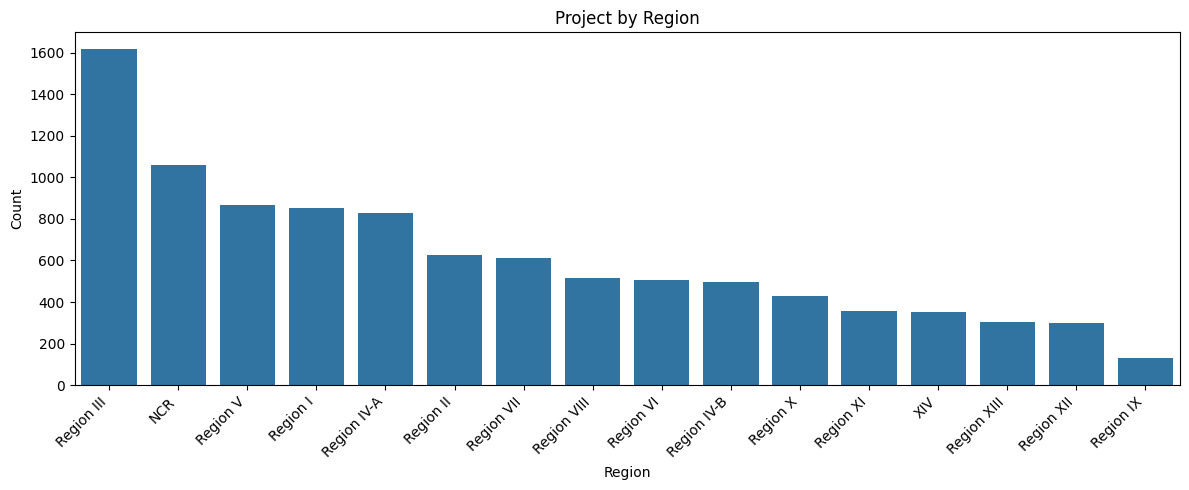

In [19]:
#sample visualization

#Projects per Region
region_count = data['Region'].value_counts().reset_index()
region_count.columns = ['Region', 'Count']

plt.figure(figsize=(12, 5))
sns.barplot(data=region_count, x='Region', y='Count')
plt.xticks(rotation=45, ha='right')
plt.title('Project by Region')
plt.tight_layout()
plt.show()

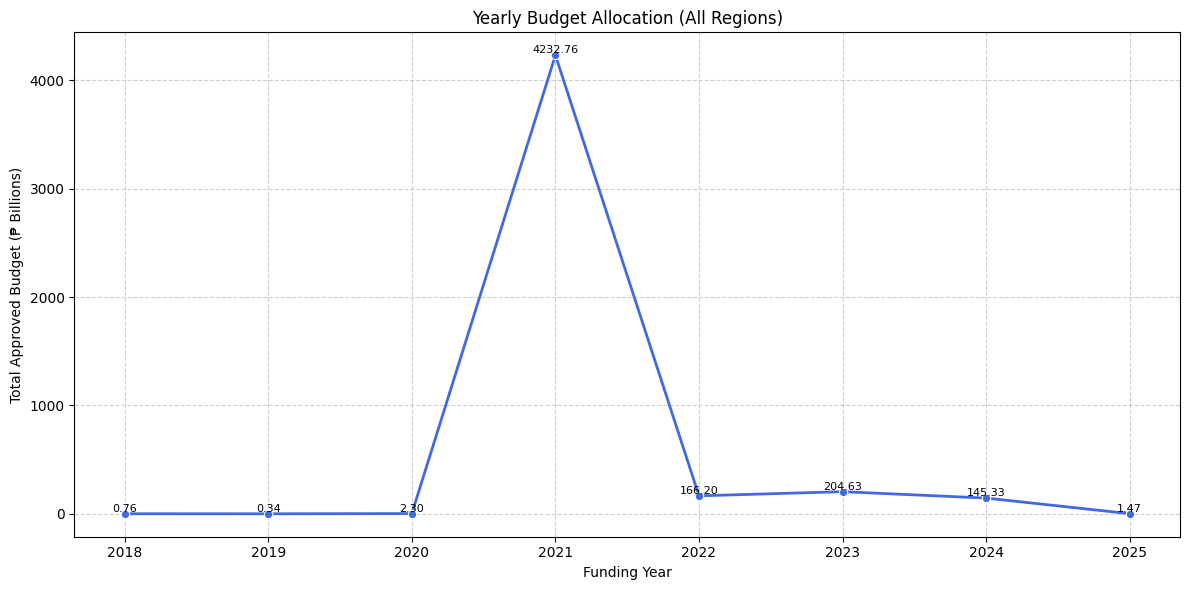

In [ ]:
#sample visualization no. 2
# Yearly Budget Allocation (All Regions)

yearly_budget = data.groupby("FundingYear")["ApprovedBudgetForContract"].sum().reset_index()

yearly_budget["Budget_Billion"] = yearly_budget["ApprovedBudgetForContract"] / 1e9

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_budget, x="FundingYear", y="Budget_Billion", marker="o", linewidth=2, color="royalblue")

for x, y in zip(yearly_budget["FundingYear"], yearly_budget["Budget_Billion"]):
    plt.text(x, y, f"{y:.2f}", ha="center", va="bottom", fontsize=8)

plt.xlabel("Funding Year")
plt.ylabel("Total Approved Budget (₱ Billions)")
plt.title("Yearly Budget Allocation (All Regions)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


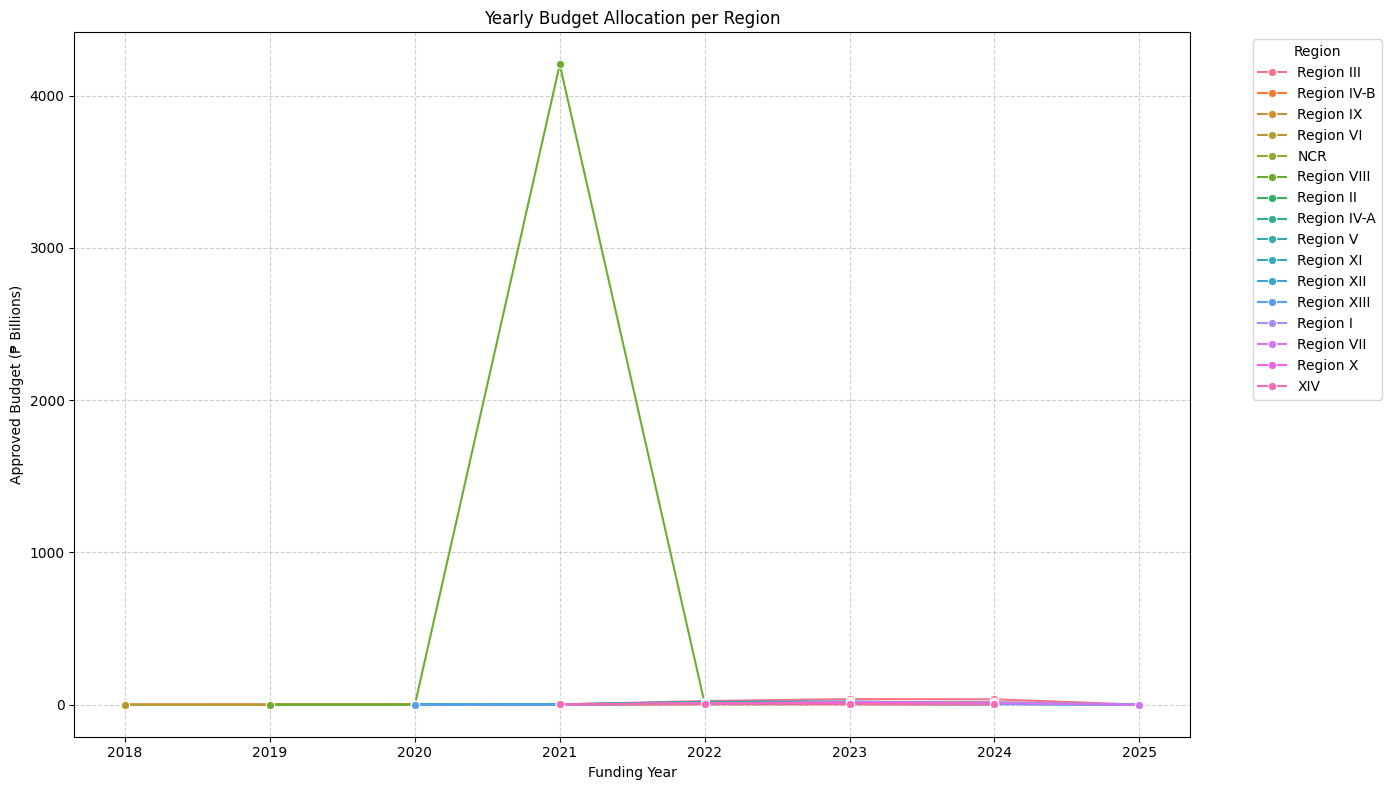

In [ ]:
# sample visualization no. 3
# yearly budget allocation per region
yearly_region_budget = (
    data.groupby(["FundingYear", "Region"])["ApprovedBudgetForContract"]
    .sum()
    .reset_index()
)


yearly_region_budget["Budget_Billion"] = yearly_region_budget["ApprovedBudgetForContract"] / 1e9

plt.figure(figsize=(14,8))
sns.lineplot(
    data=yearly_region_budget,
    x="FundingYear",
    y="Budget_Billion",
    hue="Region",       
    marker="o"
)

plt.title("Yearly Budget Allocation per Region")
plt.xlabel("Funding Year")
plt.ylabel("Approved Budget (₱ Billions)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
